### 将阈值二值化（特征值设置为0或者1）
> 用于处理连续变量，大于阈值的映射为1，而小于或者等于阈值的映射为0

> 还可以用作考虑布尔随机变量的估计器的预处理步骤（例如，使用贝叶斯设置中的伯努利分布建模）

In [5]:
# 将年龄二值化

import pandas as pd

data = pd.read_csv(r"Narrativedata.csv",index_col = 0)
data.loc[:,"Age"] = data.loc[:,"Age"].fillna(data.loc[:,"Age"].median())
data.dropna(axis =0,inplace = True)
data_2 = data.copy()

from sklearn.preprocessing import Binarizer
x = data_2.iloc[:,0].values.reshape(-1,1) # 类为特征专用，所以不能使用一维数组
transformer = Binarizer(threshold = 30).fit_transform(x)
transformer

array([[0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],

### 将连续变量划分为分类变量的类
> 将连续型变量排序后按顺序分箱后编码（preprocessing.KBinsDiscretizer）

In [7]:
from sklearn.preprocessing import KBinsDiscretizer

x= data.iloc[:,0].values.reshape(-1,1)
est = KBinsDiscretizer(n_bins =3,encode = 'onehot',strategy ='uniform')

# 查看转换后分的箱，变成哑变量
est.fit_transform(x).toarray()

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

## 特征选择
> 特征提取，特征创造，特征选择

利用四种方法来选择特征：过滤法，嵌入法，包装法，降维算法

In [8]:
import pandas as pd
data = pd.read_csv("digit recognizor.csv")

x = data.iloc[:,1:]
y = data.iloc[:,0]
x .shape

(42000, 784)

Filter过滤法
过滤方法作为常用额度预处理步骤，完全独立于任何机器学习算法，同事根据各种同居检验中的分数以及相关性的主表来选择特征
#### 方差过滤

In [10]:
# 方差过滤
# 无论接下来是什么样的特征工程，都要优先消除方差为0 的特征VarianceThreshold有重要参数threshold，表示
# 方差的阈值，会舍弃方差小于threshold的特征，不填默认为0 ，即删除所有的记录都相同的特征

from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold() # 实例化，不填参数默认方差为0
x_var0 = selector.fit_transform(x)

# x = VarianceThreshold().fit_transform(x)
x_var0.shape

(42000, 708)

In [14]:
# 比如我们希望通过方差来去掉筛选掉一般的特征，那么我们可以找到特征的中位数我作为threshold的参数
import numpy as np
median_nu = np.median(x.var().values)
x_fsvar = VarianceThreshold(median_nu).fit_transform(x)
x_fsvar.shape

(42000, 392)

In [17]:
# 方差过滤对模型的影响
# 分别使用KNN和随机森林的方发在方差过滤前和 过滤后运行的效果和运行时间进行对比
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score
import numpy as np

x = data.iloc[:,1:]
y = data.iloc[:,0]
x_fsvar = VarianceThreshold(np.median(x.var().values)).fit_transform(x)


In [18]:
cross_val_score(KNN(),x,y,cv =5).mean()

0.965857142857143

In [19]:
cross_val_score(KNN(),x_fsvar,y,cv =5).mean()

0.966

In [23]:
# 利用随机森林
cross_val_score(RFC(n_estimators = 100,random_state =0),x,y,cv =5).mean()

0.9642142857142856

In [24]:
cross_val_score(RFC(n_estimators = 100,random_state = 0),x_fsvar,y,cv=5).mean()

0.9637142857142857

#### 相关性过过滤
> 在sklearn中我们有三中方法来评判特征与标签之间的相关性：卡方，F检验，互信息

> 卡方过滤是专门针对离散型标签（即分类问题）的相关性过滤，计算每个非负特征和标签之间的卡方统计量，并依照卡方统计量由高到低为特征排名

In [25]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# 假设在这里我们一直需要300个特征
x_fchi = SelectKBest(chi2,k = 300).fit_transform(x_fsvar,y)
x_fchi.shape

(42000, 300)

In [28]:
# 验证模型显示准确性
cross_val_score(RFC(n_estimators = 100,random_state =0),x_fchi,y,cv =5).mean()

0.9597619047619048

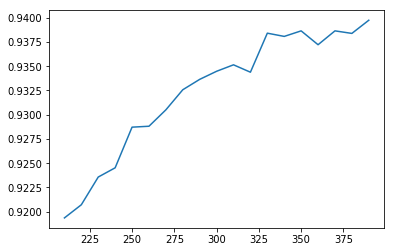

In [30]:
# 如何选取最优的K参数，可以参考学习曲线
%matplotlib inline
import matplotlib.pyplot as plt
score = []

for i in range(390,200,-10):
    x_fschi = SelectKBest(chi2,k =i).fit_transform(x_fsvar,y)
    once = cross_val_score(RFC(n_estimators =10,random_state =0),x_fschi,y,cv =5).mean()
    score.append(once)
    
plt.plot(range(390,200,-10),score)
plt.show()

In [34]:
# 另外一种选取K值得方法，看P值来选择K
"""
卡方的检验的本质是推测两组之间的差异，其检验的原假设是“两组数据是相互独立的”。卡方检验返回卡方值和P值
两个统计量其中卡方值很难界定有效的范围，为P值我们可以使用0.01或者0.05作为显著性水平即P值判断边界
要选取P值小于0.05的特征

"""
chivalue,pvalues_chi = chi2(x_fsvar,y)
chivalue.shape

(392,)

In [37]:
(pvalues_chi >0.05).sum()

0

In [40]:
# K取多少值，我们想要消除所有的Ｐ值大于设定值，比如０.０５或者０.０１的特征
k = chivalue.shape[0] - (pvalues_chi >0.05).sum()

# x_fschi = SelectKBest(chi2,k = 具体的K值).fit_transform(x_fsvar,y)
# cross_val_score(RFC(n_estimators = 10,random_state = 0),x_fschi,y,cv =5).mean()
k

392

### F检验
> 方差齐性检验，使用来捕捉每个特征与标签之间的线性关系的过滤方法。它即可以做回归也可以做分类

> 和卡方检验一样，这两个类需要和类SelectKBest连用，并且我们也可以直接通过输出统计量来判断我们到底需要一个什么的K，值得注意的是，F检验在数据服从正态分布时效果非常稳定，因此如果使用F检验过滤，会将数据转换成服从正态分布的方式

> F检验的本质是寻找两组数据之间的线性关系，我同样是选取P小于0.05或者0.01的特征，这时是显著线性相关

In [41]:
from sklearn.feature_selection import f_classif
F,pvalues_f = f_classif(x_fsvar,y)

F

array([ 618.65383492,  846.18897012, 1115.40617051, 1362.3677305 ,
       1452.03355369, 1381.09095571, 1138.26505266,  464.29616121,
        660.00977785,  849.66393412, 1004.7450309 , 1124.76177588,
       1200.99190762, 1209.29489877, 1110.4944286 ,  854.66183292,
        577.52063451,  342.09729054,  178.67397866,  118.01145533,
        612.12261014,  899.40904291, 1196.17528948, 1424.49864852,
       1569.26556677, 1742.49910702, 1910.98023795, 1969.20520223,
       1731.37475948, 1295.09668012,  839.15325001,  531.97951763,
        371.82392681,  336.00820537,  378.93378743,  317.47025479,
        528.94881012,  766.40792176,  947.63168717, 1086.0472161 ,
       1177.72017709, 1253.79641973, 1344.06961068, 1507.33781169,
       1616.50454434, 1512.25864876, 1289.65180587, 1051.26276412,
        839.48869386,  680.07426932,  600.85538567,  633.55772663,
        683.96908509,  347.65867784,  452.76238211,  509.16387684,
        515.7498157 ,  532.86107778,  594.62512658,  664.18740

In [42]:
pvalues_f

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 4.71193533e-220,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0

In [43]:
K = F.shape[0] - (pvalues_f > 0.05).sum()
K

392

### 互信息法
> 用来捕捉每个特征与标签额度任何关系（包含线性和非线性的关系），所以比F检验更加的强大
> 互信息法不返回P值或者F值类似的统计量，它返回“每个特征与目标之间的互信息量的估计”，这个估计量在[0,1]之间，所以越大越好，要去屌小于0 的

In [45]:
from sklearn.feature_selection import mutual_info_classif as MIC
result = MIC(x_fsvar,y)

#x_fsmic = SlectKBest(MIC,k).fit_transform(x_fsvar,y)
# cross_val_score(RFC(n_estimators =10,random_state =0),x_fsmic,y,cv =5).mean()
k = result.shape[0]-sum(result <= 0)
k

392

### 过滤法总计
> 方差过滤，基于卡方，F检验和互信息的相关性过滤

先使用方差过滤，然后使用互信息法来捕捉相关性，不过了解各种各样的过滤方法也是必要的

### Embedded嵌入法
先使用机器学习的算法和模型进行训练，得到各个特征的全职系数，根据权值系数从大到小的选择特征

In [47]:
'''
# estimators 使用的模型评估器
# threshold 特征重要性的阈值，重要性地域这个阈值的特征将会被删除
'''
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC

RFC_ = RFC(n_estimators = 10,random_state = 0)
x_embedded = SelectFromModel(RFC_,threshold = 0.005).fit_transform(x,y)
x_embedded.shape

(42000, 47)

In [48]:
import numpy as np
import matplotlib.pyplot as plt
RFC_.fit(x,y).feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.96726660e-06, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.39623410e-06,
       7.35101726e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.70425050e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.09114204e-06, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [50]:
threshold = np.linspace(0,(RFC_.fit(x,y).feature_importances_).max(),20)
threshold

array([0.        , 0.00067177, 0.00134354, 0.00201531, 0.00268707,
       0.00335884, 0.00403061, 0.00470238, 0.00537415, 0.00604592,
       0.00671769, 0.00738945, 0.00806122, 0.00873299, 0.00940476,
       0.01007653, 0.0107483 , 0.01142007, 0.01209183, 0.0127636 ])

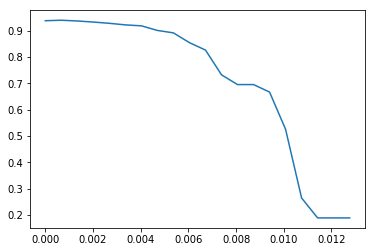

In [51]:
score = []
for i in threshold:
    x_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(x,y)
    once  = cross_val_score(RFC_,x_embedded,y,cv =5).mean()
    score.append(once)
    
plt.plot(threshold,score)
plt.show()

In [52]:
x_embedded = SelectFromModel(RFC_,threshold =0.00067).fit_transform(x,y)
x_embedded.shape

(42000, 324)

In [53]:
cross_val_score(RFC_,x_embedded,y,cv =5).mean()


0.9391190476190475

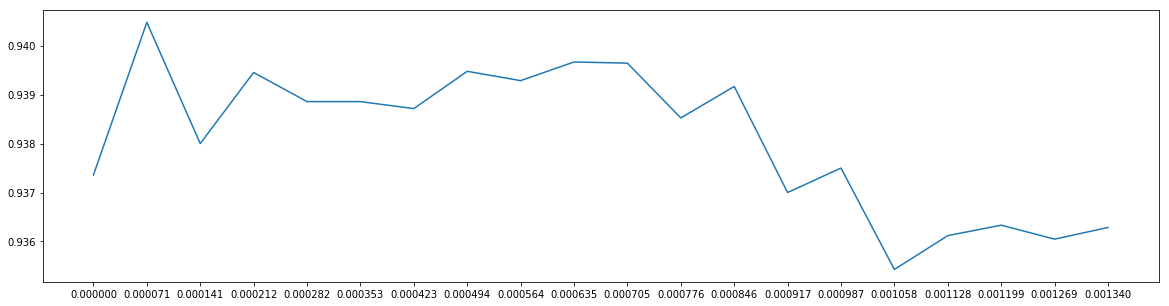

In [54]:
score2 = []
for i in np.linspace(0,0.00134,20):
    x_embedded = SelectFromModel(RFC_,threshold =i).fit_transform(x,y)
    once = cross_val_score(RFC_,x_embedded,y,cv =5).mean()
    score2.append(once)
    
plt.figure(figsize = [20,5])
plt.plot(np.linspace(0,0.00134,20),score2)
plt.xticks(np.linspace(0,0.00134,20))
plt.show()